# Challenge: Analyzing Text about Data Science

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data. 

## Goal

In this lesson, we have been discussing different concepts related to Data Science. Let's try to discover more related concepts by doing some **text mining**. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

As a text, I will use the page on Data Science from Wikipedia:

In [24]:
# url = 'https://en.wikipedia.org/wiki/Data_science'
url = "https://en.wikipedia.org/wiki/V_(singer)"
# url = "https://en.wikipedia.org/wiki/Jungkook"

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [25]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>V (singer) - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4fc1628c-cf22-400c-80e9-e4ad9d6acb15","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"V_(singer)","wgTitle":"V (singer)","wgCurRevisionId":1052676937,"wgRevisionId":1052676937,"wgArticleId":41551487,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Korean-language script (ko)","CS1 Korean-language sources (ko)","CS1 French-language sources (fr)","All articles with dead external links","Articles with dead externa

## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest build-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [26]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 V (singer) - Wikipedia V (singer) From Wikipedia, the free encyclopedia Jump to navigation Jump to search South Korean singer, songwriter and actor In this  Korean name , the family name is  Kim . V V in August 2021 Born Kim Tae-hyung  ( 1995-12-30 )  December 30, 1995  (age 25) Seo District ,  Daegu , South Korea Occupation Singer songwriter actor Awards Hwagwan Order of Cultural Merit  (2018) Musical career Genres R&B neo soul indie pop K-pop Instruments Vocals Years active 2013  ( 2013 ) –present Labels Big Hit Associated acts BTS Musical artist Korean name Hangul 김 태 형 Hanja 金 泰 亨 Revised Romanization Gim Tae-hyeong McCune–Reischauer Kim T'aehyŏng Stage name Hangul 뷔 Revised Romanization Bwi McCune–Reischauer Pwi Signature Kim Tae-hyung  ( Korean :  김태형 ; born December 30, 1995), [1]  also known by his stage name  V , is a South Korean singer, songwriter, and actor. He is a vocalist of the  South Korean boy group BTS . [2] Contents 1 Early life and education 2 Career 2.1 2013–pres

## Step 3: Getting Insights

The most important step is to turn our data into some for from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present: 

In [13]:
import sys
!{sys.executable} -m pip install nlp_rake

You should consider upgrading via the 'C:\Users\chath\anaconda3\python.exe -m pip install --upgrade pip' command.


The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [14]:
# For Taehyung
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('cultural merit', 4.0),
 ('beautiful moment', 4.0),
 ('solo song', 4.0),
 ('winter bear', 4.0),
 ('snow flower', 4.0),
 ('role model', 4.0),
 ('park bo-gum', 4.0),
 ('^ lee', 4.0),
 ('^ hwang', 4.0),
 ('^ kim', 4.0),
 ('elite daily', 4.0),
 ('^ choo', 4.0),
 ('online video', 4.0),
 ('south korea', 3.928571428571429),
 ('gallup korea', 3.928571428571429),
 ('^ herman', 3.875),
 ('sweet night', 3.857142857142857),
 ('방탄소년단 뷔', 3.8421052631578947),
 ("bts' love", 3.7777777777777777),
 ('방탄소년단', 1.8421052631578947),
 ('stage', 1.4285714285714286),
 ('lyrics', 1.4),
 ('jimin', 1.2857142857142858),
 ('billboard', 1.263157894736842),
 ('wikipedia', 1.25),
 ('enrolled', 1.25),
 ('soundcloud', 1.25),
 ('influence', 1.25),
 ('youth', 1.25),
 ('japanese', 1.25),
 ('songs', 1.2222222222222223),
 ('singer', 1.2),
 ('tamar', 1.125),
 ('stigma', 1.1111111111111112),
 ('released', 1.1),
 ('korean', 1.0175438596491229),
 ('daegu', 1.0),
 ('co-produced', 1.0),
 ('singularity', 1.0),
 ('october 24', 1.


We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

C:\Users\chath\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chath\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chath\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chath\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chath\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chath\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48596 missing from c

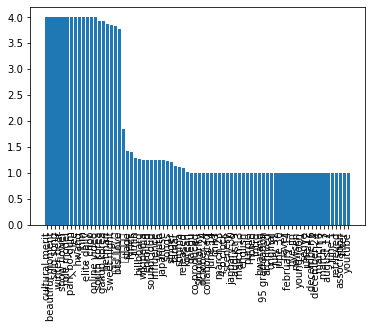

In [15]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [7]:
!{sys.executable} -m pip install wordcloud

You should consider upgrading via the 'C:\Users\chath\anaconda3\python.exe -m pip install --upgrade pip' command.


`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

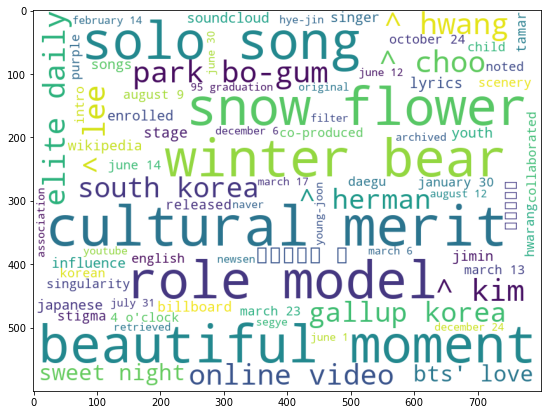

In [16]:
# For Taehyung
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

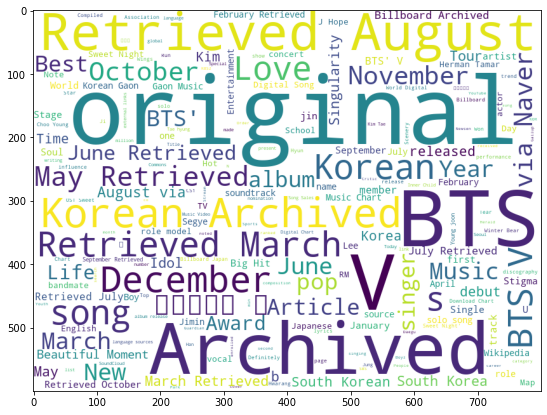

In [17]:
# For Taehyung
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as `Retrieved on`). Also, we get fewer keywords that consist of two words, such as *data scientist*, or *computer science*. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.

In this exercise we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.

In our course we will discuss all those steps in detail. 